In [1]:
import math
import numpy as np
import pandas as pd
from skimage import io, transform, segmentation, color
from skimage.future import graph
from skimage.color import rgba2rgb

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir('C:/Users/bunny/Desktop/images-227_rag/')
feature_data= pd.DataFrame(columns=['Website','Year','Month'])


(227, 227, 4)


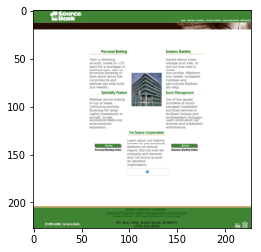

In [4]:
img = io.imread('C:/Users/bunny/Desktop/images-227/1stsource.com/20030406124422.png')
(h, w) = img.shape[:2]
channel = img.shape[2]
print((h,w,channel))
plt.imshow(img)

In [5]:
def flip(image_matrix, is_horizontal=True):
    if is_horizontal:
        return image_matrix[:, ::-1]
    else:
        return image_matrix[::-1,...]

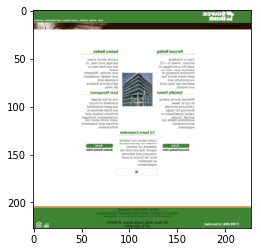

In [6]:
img_flip_lr = flip(img, True)
plt.imshow(img_flip_lr)


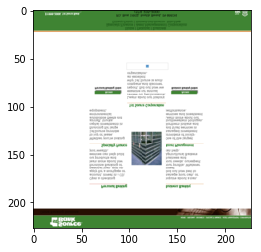

In [7]:
img_flip_ud = flip(img, False)
plt.imshow(img_flip_ud)

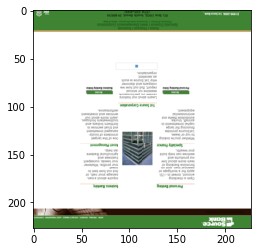

In [8]:
img_rotate_180 = transform.rotate(img, 180)
plt.imshow(img_rotate_180)

In [9]:
def calculate_point_symmetry(image1, image2):
    img_diff = image1 - image2
    # print(img_diff)
    img_diff_square = np.square(img_diff)
    # print(img_diff_square)
    img_diff_square_sum = np.sum(img_diff_square)
    # print(img_diff_square_sum)
    mean_diff_square_sum = img_diff_square_sum / img_diff.size
    # print(mean_diff_square_sum)
    # sqrt_mean_diff_square_sum = math.sqrt(mean_diff_square_sum)
    # make it from 0.0 - 65536.0 ->  1.0 - 0.0    
    if mean_diff_square_sum < 1.0:
        mean_diff_square_sum = 1.0
    log_mean_diff_square_sum = math.log2(mean_diff_square_sum)
    return (16.0 - log_mean_diff_square_sum) / 16.0


In [10]:
def get_rag_thresholding_img(original_img):
    labels1 = segmentation.slic(original_img, compactness=30, n_segments=400)
    #img_rgb = rgba2rgb(original_img)
    out1 = color.label2rgb(labels1, original_img, kind='avg')
    return out1

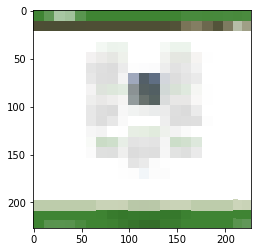

In [11]:
img_blur = get_rag_thresholding_img(img)
plt.imshow(img_blur)


In [12]:
%%time
year_final = []
month_final = []
website_final = []
feature_final = []

count_img = 0

for website in os.listdir(os.getcwd()):
    web_dir = os.path.join(os.getcwd(), website)
    for img in os.listdir(web_dir):
        img_path = os.path.join(os.getcwd(), website, img)
        img_path = img_path.replace('\\', '//')  # for Windows adjustment 
        if (os.path.exists(img_path) == -1):
            print("[ERROR] Error while reading")
        year = img[:4]
        month = img[4:6]
        img = io.imread(img_path)
        # img = get_rag_thresholding_img(img)
        # remove the alpha channel
        if img.shape[2] == 4:
            img = img[:,:,:3]
        img_flip_lr = flip(img, True)
        img_flip_ud = flip(img, False)
        img_rotate_180 = transform.rotate(img, 180)
        feature = [calculate_point_symmetry(img, img_flip_lr),
                   calculate_point_symmetry(img, img_flip_ud),
                   calculate_point_symmetry(img, img_rotate_180)]
        year_final.append(year)
        month_final.append(month)
        website_final.append(website)
        feature_final.append(feature)
        count_img += 1
        if count_img % 1000 == 0:
            print(count_img)


1000


2000


3000


4000


5000


6000


7000


8000


9000


10000


11000


12000


13000


14000


15000


Wall time: 4min 2s


In [13]:
dataSet = pd.DataFrame(feature_final,columns=['Left_Right_Symmetry','Up_Down_Symmetry','Diagonal_Symmetry'])
dataSet['Year'] = year_final
dataSet['Month'] = month_final
dataSet['Website'] = website_final


In [14]:
dataSet.shape

(15373, 6)

In [15]:
dataSet.head()

,Left_Right_Symmetry,Up_Down_Symmetry,Diagonal_Symmetry,Year,Month,Website
0,0.762560,0.661558,0.022348,2003,02,1stsource.com
1,0.749996,0.660215,0.022154,2003,02,1stsource.com
2,0.749992,0.660173,0.022174,2003,02,1stsource.com
3,0.755385,0.656405,0.022144,2003,03,1stsource.com
4,0.701596,0.634768,0.025226,2003,04,1stsource.com


In [16]:
dataSet.to_csv('symmetryFeature.csv',index=False)